# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## MISSING VALUES

In [6]:
df['Spending Score (1-100)'].value_counts


<bound method IndexOpsMixin.value_counts of 0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64>

In [7]:
df['Spending Score (1-100)'].isna().sum()

0

In [8]:
df['Annual Income (k$)'].value_counts


<bound method IndexOpsMixin.value_counts of 0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64>

In [9]:
df['Annual Income (k$)'].isna().sum()

0

# OUTLIERS

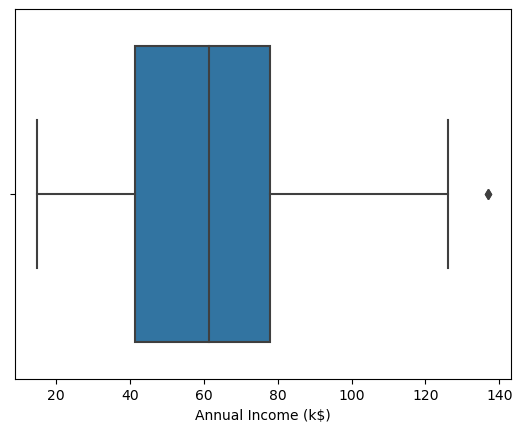

In [10]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

In [18]:
q3 = df['Annual Income (k$)'].quantile(0.75)
q1 = df['Annual Income (k$)'].quantile(0.25)
iqr = q3-q1
upper_whisker = q3+1.5*iqr
lower_whisker = q1-1.5*iqr

In [19]:
print("iqr-",iqr)
print("upper_whisker-",upper_whisker)
print("lower_whisker-",lower_whisker)

iqr- 36.5
upper_whisker- 132.75
lower_whisker- -13.25


In [20]:
upper_whisker_value = df[(df['Annual Income (k$)'] > upper_whisker)].index
upper_whisker_value


Int64Index([], dtype='int64')

In [21]:
df.loc[upper_whisker_value,'Annual Income (k$)'] = np.nan

In [22]:
df.fillna(upper_whisker,inplace=True)

In [23]:
lower_whisker_value = df[(df['Annual Income (k$)'] < lower_whisker)].index
lower_whisker_value

Int64Index([], dtype='int64')

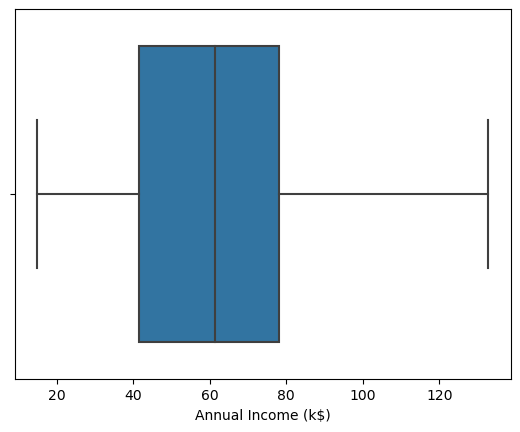

In [24]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

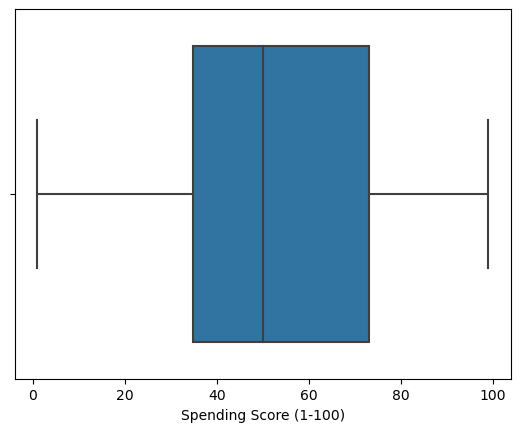

In [25]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

# SKEW

In [26]:
from scipy.stats import skew

0.28905999764974516


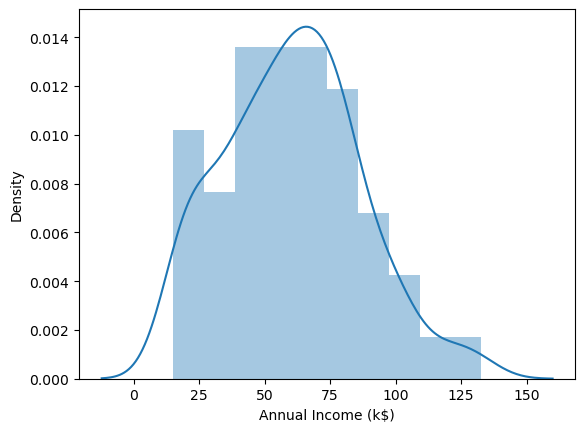

In [27]:
print(skew(df['Annual Income (k$)']))
sns.distplot(df['Annual Income (k$)'])
plt.show()

-0.04686530945553505


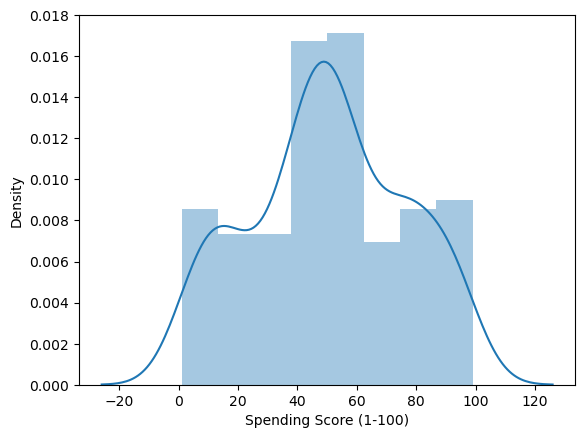

In [28]:
print(skew(df['Spending Score (1-100)']))
sns.distplot(df['Spending Score (1-100)'])
plt.show()

# CORRELATION

In [29]:
df.corr().style.background_gradient()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.979285,0.013835
Age,-0.026763,1.000000,-0.011537,-0.327227
Annual Income (k$),0.979285,-0.011537,1.000000,0.009930
Spending Score (1-100),0.013835,-0.327227,0.009930,1.000000


# SCALING

In [30]:
x = df.iloc[:,[3,4]]

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# CLUSTERING (hierarchy)

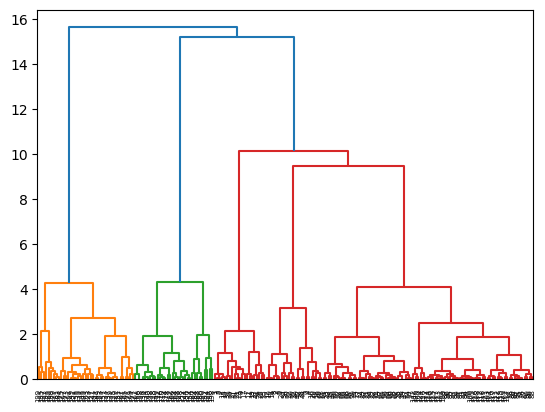

In [32]:
from scipy.cluster import hierarchy as hi
lk = hi.linkage(x,method="ward")
ddg = hi.dendrogram(lk) 
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=5)
ylabel = hc.fit_predict(x)

In [35]:
df['Outcome'] = ylabel

In [36]:
df['Outcome'].value_counts()

2    85
1    39
0    32
4    23
3    21
Name: Outcome, dtype: int64

In [37]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Outcome
0,1,Male,19,15.0,39,4
1,2,Male,21,15.0,81,3
2,3,Female,20,16.0,6,4
3,4,Female,23,16.0,77,3
4,5,Female,31,17.0,40,4


In [38]:
df[df.Outcome==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Outcome
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,166.250000,41.000000,89.273438,15.593750,0.0
std,21.005376,11.036596,16.232852,8.936548,0.0
min,129.000000,19.000000,71.000000,1.000000,0.0
25%,150.500000,34.000000,78.000000,9.750000,0.0
50%,168.000000,41.500000,86.500000,15.000000,0.0
75%,183.500000,47.000000,98.250000,20.500000,0.0
max,199.000000,59.000000,132.750000,39.000000,0.0


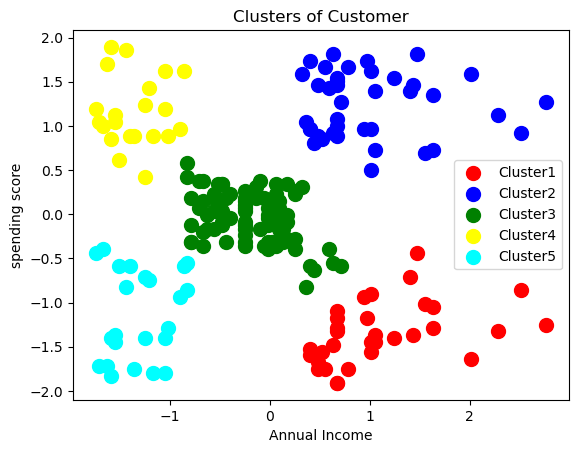

In [39]:
plt.scatter(x[ylabel==0,0],x[ylabel==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[ylabel==1,0],x[ylabel==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[ylabel==2,0],x[ylabel==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[ylabel==3,0],x[ylabel==3,1],s=100,c='yellow',label='Cluster4')
plt.scatter(x[ylabel==4,0],x[ylabel==4,1],s=100,c='cyan',label='Cluster5')

plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.title("Clusters of Customer")
plt.legend()
plt.show()

In [40]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Outcome
0,1,Male,19,15.00,39,4
1,2,Male,21,15.00,81,3
2,3,Female,20,16.00,6,4
3,4,Female,23,16.00,77,3
4,5,Female,31,17.00,40,4
...,...,...,...,...,...,...
195,196,Female,35,120.00,79,1
196,197,Female,45,126.00,28,0
197,198,Male,32,126.00,74,1
198,199,Male,32,132.75,18,0


# FEATURE AND TARGET

In [41]:
feature = df.iloc[:,[3,4]]
target = df.iloc[:,-1]

# MODEL BUILDING 

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.3,random_state=1)

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain,ytrain)
svcypred = svc.predict(xtest)
svcypred

array([2, 2, 4, 2, 0, 0, 2, 4, 3, 0, 1, 4, 3, 2, 2, 2, 1, 3, 0, 2, 2, 4,
       4, 2, 3, 0, 4, 4, 1, 3, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 4,
       2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 0], dtype=int64)

# MODEL EVALUATION

In [44]:
from sklearn.metrics import classification_report

In [47]:
train = svc.score(xtrain, ytrain)
test = svc.score(xtest, ytest)
print("DecisionTreeClassifier Report")
print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, svcypred))

    

DecisionTreeClassifier Report
Training Accuracy : 0.9928571428571429
Testing Accuracy : 0.9833333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00         8
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

